# PROBLEMA DE RUTEO DE VEHICULOS CON COSTOS ACUMULADOS 
# METODO DE SOLUCION PROPUESTO 

## CARGA DE LIBRERÍAS 
En este apartado simplemente se cargan las librerías necesarias para llevar a cabo el programa.  
**copy:** Copia de listas y matrices  
**math:** Operaciones matematicas avanzadas, en este caso, para la trigonometría y raíces  
**numpy:** Creación y modificación de matrices  
**csv:** Carga y modificación de los archivos csv  
**matplotlib**: Graficación de resultados  

In [1]:
import copy
import math
import numpy as np
import csv
import matplotlib.pyplot as plt
from time import time

## CARGA DE DATOS 
Primero que nada, debemos definir los datos que vamos a utilizar a traves de todo el programa. 

1.- Cargamos nuestros archivos de csv que contienen las coordenadas del problema y las demandas de cada uno de los clientes.  
2.- Hacemos que el deposito sea nuestro nuevo punto de inicio (0,0) y convertimos las coordenadas originales de acuerdo a eso.   
3.- Utilizando la formula de distancia entre dos puntos: raiz cuadrada de ((x2-x1)^2 + (y2-y1)^2), hacemos una matriz donde guardaremos la distancia que hay entre cada una de las ciudades hacia las demas ciudades. También guardaremos la distancia que hay entre el deposito hacia todas las ciudades en una lista diferente.  
4.- Calculamos el angulo que tiene cada ciudad con respecto al deposito, esto utilizando las coordenadas de cada ciudad en conjunto con la formula trigonometrica del arcotangente(y/x), si la ciudad está en el Cuadrante 1 se añadirá 0°, si está en el Cuadrante 2 se añadirá 180°, si está en el Cuadrante 3 se añadirá 180°, si está en el Cuadrante 4 se añadirá 360°. En dado caso que se encuentren en x=0 o y=0 se consideran otras condiciones.  



In [2]:
def carga_csv(arch_coords, arch_demands, matriz, coords):
    demands = []
    coords_org = []
    #Guardamos las coordenadas en una lista
    with open(arch_coords, newline='') as File:  
        reader = csv.reader(File)
        for row in reader:
            temporal = []
            for element in row:
                temporal.append(int(element))
            coords_org.append(temporal)
    print('COORDENADAS ORIGINALES: \n', coords_org)     
    
    # Tomando la primera coordenada como el deposito
    # Y tomando el deposito como nuestro punto de inicio (0,0)
    # Calculamos las nuevas coordenadas
    # COORDENADAS DEL DEPOSITO
    deposito = [coords_org[0][0], coords_org[0][1]]
    #Eliminamos la primera coordenada
    coords_org.pop(0)
    print()
    for cord in coords_org:
        temporal = []
        x = cord[0] - deposito[0]
        y = cord[1] - deposito[1]
        temporal.append(x)
        temporal.append(y)
        coords.append(temporal)
    print('NUEVAS COORDENADAS: \n', coords)
    
    #Guardamos las demandas en una lista
    with open(arch_demands, newline='') as File:  
        reader = csv.reader(File)
        for row in reader:
            for element in row:
                demands.append(int(element))
    print('DEMANDA: \n', demands)
    
    # Sacamos las distancias
    dimension = len(coords)
    print('Numero de Ciudades: ', dimension)
    for i in range(dimension):
        temporal = []
        for j in range(dimension):
            # Formula de distancia entre dos puntos, lo redondeamos
            dist = math.sqrt((coords[j][0]-coords[i][0])**2 + (coords[j][1]-coords[i][1])**2)
            temporal.append(dist)
        matriz.append(temporal)
    #La matriz de distancias la pasamos a una matriz de Python  
    distancias = np.array(matriz)
    print('DISTANCIAS: \n', distancias)
    
    # DISTANCIAS DEL DEPOSITO
    dist_depo = []
    for cord in coords:
        dist = math.sqrt((cord[0])**2 + (cord[1])**2)
        dist_depo.append(dist)
    print('DISTANCIA DE CIUDADES AL DEPOSITO: \n', dist_depo)
    
    # SACAMOS LOS ANGULOS
    ang = []
    grados = 0
    for coord in coords:
        if coord[0] == 0 or coord[1] == 0:
            if coord[0] == 0:
                if coord[1] > 0:
                    grados = 90
                if coord[1] < 0:
                    grados = 270
            if coord[1] == 0:
                if(coord[0] > 0):
                    grados = 0
                if(coord[0] < 0):
                    grados = 180
        else:
            # usando arcotangente(y/x) y transformando los radianes a grados
            # CUADRANTE 1: X,Y >0
            if coord[0] > 0 and coord[1] > 0:
                extra = 0
            # CUADRANTE 2
            if coord[0] < 0 and coord[1] > 0:
                extra = 180
            # CUADRANTE 3
            if coord[0] < 0 and coord[1] < 0:
                extra = 180
            if coord[0] > 0 and coord[1] < 0:
                extra = 360
            grados = math.degrees(math.atan(coord[1]/coord[0])) + extra
        ang.append(grados)
    print('ANGULOS: \n', ang)
    
    return dimension, matriz, distancias, demands, coords, ang, dist_depo

## GRAFICAR 
Grafica cada una de las ciudades tomando las coordenadas.

In [3]:
def graficar(coords):
    x = []
    y = []
    for fila in coords:
        x.append(fila[0])
        y.append(fila[1])
    plt.axhline(0, 0, 1)
    plt.axvline(0, 0, 1)
    plt.plot(x, y, 'o')
    plt.show()

## ORDENAMIENTO
Ordenamos la lista de los angulos. De aquí buscamos que angulo corresponde a cada ciudad y lo añadimos a una lista llamada orden.

In [4]:
def ordenar(ang):
    orden = []
    # creamos dos copias de los angulos para poder trabajar
    print('NUMERO DE ANGULOS: ', ang)
    ang2 =  ang.copy()
    ang3 = ang.copy()
    # ordenamos de mayor a menor
    ang2.sort()
    for element in ang2:
        # Buscamos que ciudad tiene el angulo
        n = ang3.index(element) + 1
        # Invalidamos esa ciudad para ya no volver a buscar ahí
        ang3[n-1] = 'x'
        orden.append(n)
    print('ORDEN DE LAS CIUDADES POR ANGULO: \n', orden)
    return orden



## RUTEAR VEHICULOS 
Iremos añadiendo uno por uno las ciudades que se encuentran en la lista orden hasta haber recorrido toda la lista. En cada uno de las iteraciones iremos verificando si se puede añadir la ciudad al recorrido del vehiculo, esto checando si la capacidad del vehiculo aún es apto para cumplir la demanda de la ciudad, si no lo hace, entonces iniciamos el recorrido en otro vehiculo diferente y cerramos el que teníamos antes. Al final sumamos las demandas de cada vehiculo.

In [5]:
def rutear_vehiculos(capacidad_or, orden, demands):
    temporal = [] # temporal de demandas
    capacidad = capacidad_or
    demanda = []
    # Iniciamos el recorrido desde el deposito quien es la ciudad 0
    temporal = [0]
    for ciudad in orden:
        resta = capacidad - demands[ciudad-1]
        if resta >= 0:
            capacidad = resta
            temporal.append(ciudad)
        else:
            # Regresa el vehiculo al deposito y termina el recorrido
            temporal.append(0)
            vehiculos.append(temporal)
            demanda.append(capacidad_or - capacidad)
            # Inicia el recorrido de un nuevo vehiculo desde el deposito
            capacidad = capacidad_or
            temporal = [0]
            resta = capacidad - demands[ciudad-1]
            capacidad = resta
            temporal.append(ciudad)
    # IMPRIME EL RECORRIDO DE CADA VEHICULO
    for i in range(len(vehiculos)):
        print('VEHICULO ', i+1, ': ', vehiculos[i])
        print('DEMANDA ', i+1, ':', demanda[i])
    return vehiculos




## VECINO MÁS CERCANO
En esta función, utilizaremos el algoritmo del vehiculo más cercano para determinar el recorrido que hará cada vehiculo. 
Lo que haremos será comparar que ciudad está más cerca del punto actual, empezando desde el depósito, y una vez que lo tenemos, asignamos como punto actual esa ciudad, eso hasta que lleguemos a la ultima ciudad donde regresaremos al depósito. 
 
1.- Dentro de un ciclo, vamos a atravesar cada uno de los recorridos en los diferentes vehiculos que tenemos.   
2.- Vamos a evitar que se recorran las otras ciudades que no estén dentro del vehiculo o que ya se hayan recorrido, cancelando las distancias de estas ciudades dentro de la matriz de distancias.  
3.- Compararemos que ciudad está más cerca del deposito dentro de las ciudades que podemos recorrer  
4.- Calculamos la distancia que hay entre el punto actual y el nuevo punto, lo añadimos dentro de la lista de costos  
5.- Hacemos esta ciudad nuestro nuevo punto actual y la agregamos a las ciudades que ya no se podrán recorrer.   
6.- Dentro de un ciclo, recorreremos lo que quedan de las demas ciudades dentro del recorrido del vehiculo actual.  
7.- Se repite el punto 2  
8.- Compararemos que ciudad está más cerca del punto actual dentro de las ciudades que podemos recorrer  
9.- Se repite el punto 4 y 5  
FIN DE CICLO  
FIN DE CICLO  


In [6]:
def vecino_cercano(distancias, vehiculos, dist_depo, dimension):
    costos=[]
    vehiculos2 = copy.deepcopy(vehiculos)
    
    vh_final = []
    
    for v in range(len(vehiculos2)):
        vehiculos2[v].pop(0)
        vehiculos2[v].pop()
        # reset ruta y prohibidos
        ruta = [0]
        prohibidos = []
        costo = []
        # Reset de distancias
        distancias2 = distancias.copy()
        # Reset de distancias hacia el deposito 
        dist_depo2 = dist_depo.copy()
        # Evitamos que recorra las otras ciudades de los vehiculos
        for i in range(dimension):
            if not i+1 in vehiculos2[v]:
                prohibidos.append(i+1)
        prohibidos.sort()
        # cambiamos los valores para que no se puedan elegir aquellas ciudades ya recorridas
        for j in prohibidos:
            dist_depo2[j-1] = 100000
        # buscamos la ubicacion de la ciudad que cueste menos dirigirse
        index = dist_depo2.index(min(dist_depo2)) + 1
        # la agregamos a nuestra ruta
        ruta.append(index)
        # la agregamos a prohibidos
        prohibidos.append(index)
        # agregamos su costo
        costo.append(dist_depo2[index-1])
        #la eliminamos de las ciudades que hay que recorrer
        vehiculos2[v].pop(vehiculos2[v].index(index))
        
        for k in range(len(vehiculos2[v])):
            prohibidos.sort()
            # cambiamos los valores para que no se puedan elegir aquellas ciudades ya recorridas
            for j in prohibidos:
                distancias2[index-1][j-1] = 100000
            # Buscamos la ciudad más cercana a la actual
            prov = np.where(np.amin(distancias2[index-1]) == distancias2[index-1])
            # agregamos el costo de recorrido a la lista de costos
            costo.append(distancias2[index-1][prov[0][0]])
            # nuestra nueva ciudad será a la que costó menos
            index = prov[0][0] + 1
            # agregamos a la ruta
            ruta.append(index)
            #agregamos a prohibidos
            prohibidos.append(index)
            # reseteamos la variable
            del prov;
        del distancias2;
        del dist_depo2;
        
        ruta.append(0)
        vh_final.append(ruta)
        costos.append(costo)
        
    for i in range(len(vh_final)):
        print('VEHICULO ', i+1, ': ', vh_final[i])
    return  costos, vh_final




## CALCULO DE COSTOS 

Dado que en el CCVRP se calculan los costos de una manera diferente a un problema de vehiculos general, dado que aquí se le conoce como latencia. La formula del costo por vehiculo sería.. 
Siendo n el numero de ciudades en ese recorrido. 
**(n)(Costo de Ciudad 0,1) + (n-1)(Costo de Ciudad1,2) + (n-2)(CostoCiudad2,3) + ... + (1)(CostoDeCiudad n-1,n)** 
 
1- Dentro de un ciclo iremos a cada uno de los costos de cada recorrido de los diferentes vehiculos. 
2- Calculamos el numero de ciudades dentro del recorrido del vehiculo sin contar el deposito y lo declaramos como 'j'. 
3-Multiplicamos j por el costo de la ciudad y lo añadimos a la suma. 
4- Añadimos esa suma a la lista de costos finales. 
FIN DEL CICLO. 
5- Sumamos todos los elementos de la lista de costos finales.  

In [7]:
def calculo_costos(costos):
        fin_cost = []
        for vehiculo in costos:
            suma = 0
            j = len(vehiculo)
            for i in range(j):
                suma = suma + j*vehiculo[i]
                j = j - 1
            fin_cost.append(suma)
        i=1
        for cost_veh in fin_cost:
            print('COSTO VEHICULO ', i, ': ', cost_veh)
            i = i + 1
        print('COSTO TOTAL: ', sum(fin_cost))
        return fin_cost


## GRAFICAR RECORRIDO 
Graficamos el recorrido de cada vehiculo de acuerdo a sus coordenadas.

In [8]:
def graficar_recorrido(vehiculos, coords):
    vehiculos2 = copy.deepcopy(vehiculos)
    plt.title("RECORRIDO VEHICULOS")
    i = 1
    for vehiculo in vehiculos2:
        x = []
        y = []
        vehiculo.pop(0)
        vehiculo.pop()
        x.append(0)
        y.append(0)
        for ciudad in vehiculo:
            x.append(coords[ciudad-1][0])
            y.append(coords[ciudad-1][1])
        x.append(0)
        y.append(0)
        plt.axhline(0, 0, 1)
        plt.axvline(0, 0, 1)
        plt.plot(x, y, 'o-')
    plt.show()
    


# EXPERIMENTACIÓN COMPUTACIONAL 
## PROBLEMA VRPNC1m

#### CARGA DE DATOS

In [9]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC1/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC1/ClientDemands.csv'

matriz = []
demands = []
coords = []
dist_depo = []
# MEDICION DEL TIEMPO 
start_time = time()
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[30, 40], [37, 52], [49, 49], [52, 64], [20, 26], [40, 30], [21, 47], [17, 63], [31, 62], [52, 33], [51, 21], [42, 41], [31, 32], [5, 25], [12, 42], [36, 16], [52, 41], [27, 23], [17, 33], [13, 13], [57, 58], [62, 42], [42, 57], [16, 57], [8, 52], [7, 38], [27, 68], [30, 48], [43, 67], [58, 48], [58, 27], [37, 69], [38, 46], [46, 10], [61, 33], [62, 63], [63, 69], [32, 22], [45, 35], [59, 15], [5, 6], [10, 17], [21, 10], [5, 64], [30, 15], [39, 10], [32, 39], [25, 32], [25, 55], [48, 28], [56, 37]]

NUEVAS COORDENADAS: 
 [[7, 12], [19, 9], [22, 24], [-10, -14], [10, -10], [-9, 7], [-13, 23], [1, 22], [22, -7], [21, -19], [12, 1], [1, -8], [-25, -15], [-18, 2], [6, -24], [22, 1], [-3, -17], [-13, -7], [-17, -27], [27, 18], [32, 2], [12, 17], [-14, 17], [-22, 12], [-23, -2], [-3, 28], [0, 8], [13, 27], [28, 8], [28, -13], [7, 29], [8, 6], [16, -30], [31, -7], [32, 23], [33, 29], [2, -18], [15, -5], [29, -25], [-25, -34], [-20, -23], [-9, -30], [-25, 24], [0, -2

### GRAFICAR

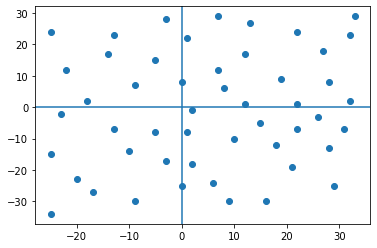

In [10]:
graficar(coords)


### ORDENAMIENTO

In [11]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [16, 21, 11, 29, 2, 20, 35, 32, 36, 3, 22, 1, 28, 31, 8, 27, 26, 48, 7, 23, 43, 6, 24, 14, 25, 18, 13, 41, 40, 4, 19, 47, 42, 17, 44, 37, 12, 15, 45, 33, 5, 10, 39, 49, 46, 30, 38, 9, 34, 50]


### RUTEO DE VEHICULOS

In [12]:
vehiculos = []
capacidad_or = 160
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 16, 21, 11, 29, 2, 20, 35, 32, 36, 3, 0]
DEMANDA  1 : 157
VEHICULO  2 :  [0, 22, 1, 28, 31, 8, 27, 26, 48, 7, 23, 43, 0]
DEMANDA  2 : 148
VEHICULO  3 :  [0, 6, 24, 14, 25, 18, 13, 0]
DEMANDA  3 : 138
VEHICULO  4 :  [0, 41, 40, 4, 19, 47, 42, 17, 44, 37, 12, 15, 0]
DEMANDA  4 : 157
VEHICULO  5 :  [0, 45, 33, 5, 10, 39, 49, 46, 30, 38, 9, 0]
DEMANDA  5 : 141


### VECINO MAS CERCANO

In [13]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 32, 11, 16, 2, 29, 21, 20, 35, 36, 3, 0]
VEHICULO  2 :  [0, 27, 1, 22, 28, 31, 8, 26, 7, 23, 48, 43, 0]
VEHICULO  3 :  [0, 6, 14, 25, 18, 13, 24, 0]
VEHICULO  4 :  [0, 12, 47, 4, 17, 37, 15, 44, 42, 19, 41, 40, 0]
VEHICULO  5 :  [0, 46, 5, 38, 9, 49, 10, 30, 39, 33, 45, 0]


### CALCULO DE COSTOS

In [14]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  500.3379608643311
COSTO VEHICULO  2 :  551.646307754434
COSTO VEHICULO  3 :  235.05275844123568
COSTO VEHICULO  4 :  478.17440948705877
COSTO VEHICULO  5 :  422.6216917778494
COSTO TOTAL:  2187.833128324909


### GRAFICAR RECORRIDO

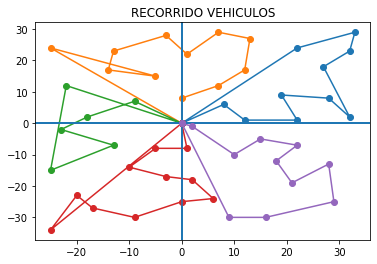

TIEMPO REQUERIDO:  0.5523014068603516


In [15]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO REQUERIDO: ', elapsed_time)

In [16]:
# RESETEAR TOOOOODAS LAS VARIABLES
del matriz
del demands
del coords
del dist_depo
del dimension
del distancias 
del ang
del orden
del vehiculos
del capacidad_or
del costos

## PROBLEMA VRPNC2m

#### CARGA DE DATOS

In [17]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC2/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC2/ClientDemands.csv'

matriz = []
demands = []
coords = []
dist_depo = []
# MEDICION DE TIEMPO
start_time = time()
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[40, 40], [22, 22], [36, 26], [21, 45], [45, 35], [55, 20], [33, 34], [50, 50], [55, 45], [26, 59], [40, 66], [55, 65], [35, 51], [62, 35], [62, 57], [62, 24], [21, 36], [33, 44], [9, 56], [62, 48], [66, 14], [44, 13], [26, 13], [11, 28], [7, 43], [17, 64], [41, 46], [55, 34], [35, 16], [52, 26], [43, 26], [31, 76], [22, 53], [26, 29], [50, 40], [55, 50], [54, 10], [60, 15], [47, 66], [30, 60], [30, 50], [12, 17], [15, 14], [16, 19], [21, 48], [50, 30], [51, 42], [50, 15], [48, 21], [12, 38], [15, 56], [29, 39], [54, 38], [55, 57], [67, 41], [10, 70], [6, 25], [65, 27], [40, 60], [70, 64], [64, 4], [36, 6], [30, 20], [20, 30], [15, 5], [50, 70], [57, 72], [45, 42], [38, 33], [50, 4], [66, 8], [59, 5], [35, 60], [27, 24], [40, 20], [40, 37]]

NUEVAS COORDENADAS: 
 [[-18, -18], [-4, -14], [-19, 5], [5, -5], [15, -20], [-7, -6], [10, 10], [15, 5], [-14, 19], [0, 26], [15, 25], [-5, 11], [22, -5], [22, 17], [22, -16], [-19, -4], [-7, 4], [-31, 16], [22, 8], [26, 

### GRAFICAR

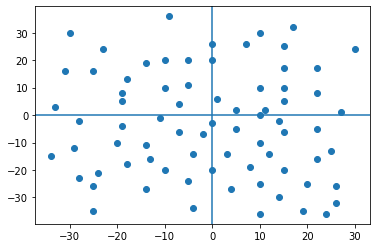

In [18]:
graficar(coords)


### ORDENAMIENTO

In [19]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [34, 54, 46, 8, 19, 67, 35, 14, 59, 7, 53, 11, 66, 65, 38, 26, 10, 58, 31, 72, 12, 39, 9, 25, 40, 55, 32, 50, 17, 18, 44, 3, 24, 49, 51, 16, 23, 56, 63, 33, 41, 6, 43, 1, 42, 73, 64, 22, 62, 2, 68, 28, 61, 74, 75, 21, 30, 69, 47, 48, 36, 71, 60, 5, 37, 70, 29, 4, 20, 45, 15, 57, 27, 13, 52]


### RUTEO DE VEHICULOS

In [20]:
vehiculos = []
capacidad_or = 140
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 34, 54, 46, 8, 19, 67, 35, 0]
DEMANDA  1 : 133
VEHICULO  2 :  [0, 14, 59, 7, 53, 11, 0]
DEMANDA  2 : 129
VEHICULO  3 :  [0, 66, 65, 38, 26, 10, 58, 0]
DEMANDA  3 : 135
VEHICULO  4 :  [0, 31, 72, 12, 39, 9, 25, 40, 0]
DEMANDA  4 : 134
VEHICULO  5 :  [0, 55, 32, 50, 17, 18, 44, 3, 0]
DEMANDA  5 : 118
VEHICULO  6 :  [0, 24, 49, 51, 16, 23, 56, 63, 33, 0]
DEMANDA  6 : 133
VEHICULO  7 :  [0, 41, 6, 43, 1, 42, 73, 64, 22, 0]
DEMANDA  7 : 127
VEHICULO  8 :  [0, 62, 2, 68, 28, 61, 74, 75, 0]
DEMANDA  8 : 128
VEHICULO  9 :  [0, 21, 30, 69, 47, 48, 36, 71, 60, 0]
DEMANDA  9 : 125
VEHICULO  10 :  [0, 5, 37, 70, 29, 4, 20, 45, 15, 0]
DEMANDA  10 : 140


### VECINO MAS CERCANO

In [21]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 67, 34, 46, 8, 35, 19, 54, 0]
VEHICULO  2 :  [0, 7, 53, 14, 11, 59, 0]
VEHICULO  3 :  [0, 26, 58, 10, 38, 65, 66, 0]
VEHICULO  4 :  [0, 12, 40, 9, 39, 72, 31, 25, 0]
VEHICULO  5 :  [0, 17, 3, 44, 32, 50, 18, 55, 0]
VEHICULO  6 :  [0, 51, 16, 63, 33, 23, 56, 49, 24, 0]
VEHICULO  7 :  [0, 6, 73, 1, 43, 41, 42, 64, 22, 0]
VEHICULO  8 :  [0, 75, 68, 2, 74, 28, 62, 61, 0]
VEHICULO  9 :  [0, 30, 48, 47, 21, 36, 71, 60, 69, 0]
VEHICULO  10 :  [0, 4, 45, 29, 5, 37, 20, 70, 15, 0]


### CALCULO DE COSTOS

In [22]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  139.35002742585118
COSTO VEHICULO  2 :  162.41356719066746
COSTO VEHICULO  3 :  168.95502930916084
COSTO VEHICULO  4 :  247.33608432769694
COSTO VEHICULO  5 :  212.96443793042468
COSTO VEHICULO  6 :  328.4140533244469
COSTO VEHICULO  7 :  283.4596270815728
COSTO VEHICULO  8 :  160.32494277900403
COSTO VEHICULO  9 :  320.7826202113977
COSTO VEHICULO  10 :  241.46483391130369
COSTO TOTAL:  2265.465223491526


### CALCULO DE COSTOS

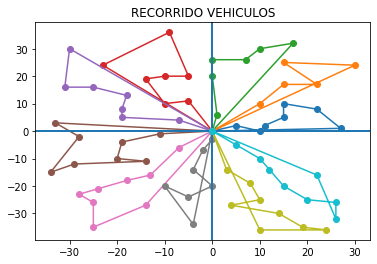

TIEMPO EN COMPUTARIZAR:  0.6014053821563721


In [23]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO EN COMPUTARIZAR: ', elapsed_time)


In [24]:
matriz.clear()
del distancias;
demands.clear()
ang.clear()
dist_depo.clear()
orden.clear()


## PROBLEMA VRPNC3m

### CARGA DE DATOS

In [25]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC3/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC3/ClientDemands.csv'
# MEDICION DE TIEMPO
start_time = time()
matriz = []
demands = []
coords = []
dist_depo = []
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[35, 35], [41, 49], [35, 17], [55, 45], [55, 20], [15, 30], [25, 30], [20, 50], [10, 43], [55, 60], [30, 60], [20, 65], [50, 35], [30, 25], [15, 10], [30, 5], [10, 20], [5, 30], [20, 40], [15, 60], [45, 65], [45, 20], [45, 10], [55, 5], [65, 35], [65, 20], [45, 30], [35, 40], [41, 37], [64, 42], [40, 60], [31, 52], [35, 69], [53, 52], [65, 55], [63, 65], [2, 60], [20, 20], [5, 5], [60, 12], [40, 25], [42, 7], [24, 12], [23, 3], [11, 14], [6, 38], [2, 48], [8, 56], [13, 52], [6, 68], [47, 47], [49, 58], [27, 43], [37, 31], [57, 29], [63, 23], [53, 12], [32, 12], [36, 26], [21, 24], [17, 34], [12, 24], [24, 58], [27, 69], [15, 77], [62, 77], [49, 73], [67, 5], [56, 39], [37, 47], [37, 56], [57, 68], [47, 16], [44, 17], [46, 13], [49, 11], [49, 42], [53, 43], [61, 52], [57, 48], [56, 37], [55, 54], [15, 47], [14, 37], [11, 31], [16, 22], [4, 18], [28, 18], [26, 52], [26, 35], [31, 67], [15, 19], [22, 22], [18, 24], [26, 27], [25, 24], [22, 27], [25, 21], [19, 21

### GRAFICAR


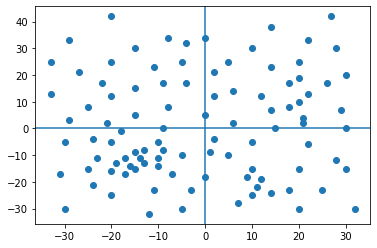

In [26]:
graficar(coords)


### ORDENAMIENTO 


In [27]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [12, 24, 80, 68, 29, 28, 77, 3, 76, 79, 78, 34, 33, 81, 50, 35, 9, 71, 65, 51, 1, 66, 20, 30, 69, 70, 27, 32, 90, 10, 31, 63, 64, 62, 11, 88, 19, 49, 7, 52, 47, 48, 36, 82, 46, 18, 8, 45, 83, 89, 60, 17, 84, 5, 61, 6, 86, 16, 99, 96, 93, 85, 59, 91, 44, 98, 94, 37, 38, 92, 100, 95, 14, 97, 13, 42, 87, 43, 15, 57, 2, 58, 41, 22, 40, 53, 73, 74, 75, 72, 21, 23, 56, 67, 39, 4, 25, 26, 55, 54]


### RUTEO DE VEHICULOS


In [28]:
vehiculos = []
capacidad_or = 200
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 12, 24, 80, 68, 29, 28, 77, 3, 76, 79, 78, 34, 33, 0]
DEMANDA  1 : 180
VEHICULO  2 :  [0, 81, 50, 35, 9, 71, 65, 51, 1, 66, 20, 30, 69, 70, 27, 0]
DEMANDA  2 : 200
VEHICULO  3 :  [0, 32, 90, 10, 31, 63, 64, 62, 11, 88, 19, 49, 7, 52, 0]
DEMANDA  3 : 189
VEHICULO  4 :  [0, 47, 48, 36, 82, 46, 18, 8, 45, 83, 89, 60, 17, 84, 5, 61, 0]
DEMANDA  4 : 199
VEHICULO  5 :  [0, 6, 86, 16, 99, 96, 93, 85, 59, 91, 44, 98, 0]
DEMANDA  5 : 197
VEHICULO  6 :  [0, 94, 37, 38, 92, 100, 95, 14, 97, 13, 42, 87, 43, 15, 57, 0]
DEMANDA  6 : 198
VEHICULO  7 :  [0, 2, 58, 41, 22, 40, 53, 73, 74, 75, 72, 21, 23, 56, 0]
DEMANDA  7 : 177


### VECINO MAS CERCANO


In [29]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 28, 12, 80, 68, 77, 3, 79, 33, 78, 34, 29, 24, 76, 0]
VEHICULO  2 :  [0, 27, 69, 1, 50, 81, 9, 51, 20, 30, 70, 66, 71, 35, 65, 0]
VEHICULO  3 :  [0, 52, 88, 31, 10, 62, 11, 19, 7, 63, 90, 32, 64, 49, 0]
VEHICULO  4 :  [0, 89, 18, 60, 83, 84, 5, 61, 17, 45, 8, 82, 48, 47, 36, 46, 0]
VEHICULO  5 :  [0, 6, 96, 99, 59, 93, 85, 91, 98, 16, 44, 86, 0]
VEHICULO  6 :  [0, 13, 94, 95, 97, 92, 37, 100, 42, 87, 57, 15, 43, 14, 38, 0]
VEHICULO  7 :  [0, 53, 58, 40, 21, 73, 72, 74, 22, 75, 56, 23, 41, 2, 0]


### CALCULO DE COSTOS


In [30]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  539.9528618502884
COSTO VEHICULO  2 :  759.6318343703695
COSTO VEHICULO  3 :  817.7204593649216
COSTO VEHICULO  4 :  825.6557332876672
COSTO VEHICULO  5 :  322.48773434380234
COSTO VEHICULO  6 :  587.4363939021789
COSTO VEHICULO  7 :  427.7199001736744
COSTO TOTAL:  4280.604917292902


### GRAFICAR RECORRIDO

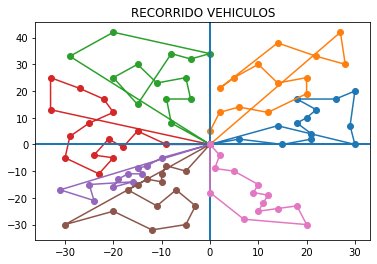

TIEMPO EN COMPUTARIZAR:  0.4089064598083496


In [31]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO EN COMPUTARIZAR: ', elapsed_time)

In [32]:
matriz.clear()
del distancias;
demands.clear()
ang.clear()
dist_depo.clear()
orden.clear()


## PROBLEMA VRPNC4m

### CARGA DE DATOS


In [33]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC4/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC4/ClientDemands.csv'
# MEDICION DE TIEMPO
start_time = time()
matriz = []
demands = []
coords = []
dist_depo = []
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[35, 35], [41, 49], [35, 17], [55, 45], [55, 20], [15, 30], [25, 30], [20, 50], [10, 43], [55, 60], [30, 60], [20, 65], [50, 35], [30, 25], [15, 10], [30, 5], [10, 20], [5, 30], [20, 40], [15, 60], [45, 65], [45, 20], [45, 10], [55, 5], [65, 35], [65, 20], [45, 30], [35, 40], [41, 37], [64, 42], [40, 60], [31, 52], [35, 69], [53, 52], [65, 55], [63, 65], [2, 60], [20, 20], [5, 5], [60, 12], [40, 25], [42, 7], [24, 12], [23, 3], [11, 14], [6, 38], [2, 48], [8, 56], [13, 52], [6, 68], [47, 47], [49, 58], [27, 43], [37, 31], [57, 29], [63, 23], [53, 12], [32, 12], [36, 26], [21, 24], [17, 34], [12, 24], [24, 58], [27, 69], [15, 77], [62, 77], [49, 73], [67, 5], [56, 39], [37, 47], [37, 56], [57, 68], [47, 16], [44, 17], [46, 13], [49, 11], [49, 42], [53, 43], [61, 52], [57, 48], [56, 37], [55, 54], [15, 47], [14, 37], [11, 31], [16, 22], [4, 18], [28, 18], [26, 52], [26, 35], [31, 67], [15, 19], [22, 22], [18, 24], [26, 27], [25, 24], [22, 27], [25, 21], [19, 21

### GRAFICAR


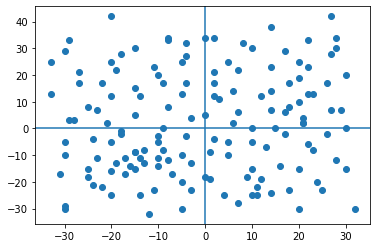

In [34]:
graficar(coords)


### ORDENAMIENTO 


In [35]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [12, 24, 138, 80, 150, 68, 29, 121, 28, 116, 77, 3, 76, 129, 79, 78, 34, 111, 33, 81, 50, 102, 135, 120, 35, 136, 9, 71, 65, 51, 103, 1, 66, 20, 122, 132, 128, 30, 69, 101, 70, 131, 27, 32, 90, 108, 10, 31, 63, 126, 127, 64, 62, 11, 148, 88, 107, 146, 19, 123, 49, 7, 52, 143, 106, 47, 48, 36, 124, 82, 46, 18, 8, 114, 125, 45, 83, 89, 60, 118, 17, 84, 5, 147, 113, 61, 6, 86, 16, 99, 104, 96, 93, 85, 141, 112, 59, 91, 44, 98, 94, 140, 37, 38, 92, 100, 119, 95, 14, 97, 117, 142, 13, 42, 87, 43, 144, 137, 15, 57, 2, 115, 58, 145, 41, 22, 133, 40, 53, 73, 74, 75, 72, 21, 23, 56, 105, 67, 39, 110, 139, 4, 149, 25, 26, 55, 130, 54, 109, 134]


### RUTEO DE VEHICULOS


In [36]:
vehiculos = []
capacidad_or = 200
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 12, 24, 138, 80, 150, 68, 29, 121, 28, 116, 77, 3, 76, 129, 0]
DEMANDA  1 : 183
VEHICULO  2 :  [0, 79, 78, 34, 111, 33, 81, 50, 102, 135, 120, 35, 136, 0]
DEMANDA  2 : 198
VEHICULO  3 :  [0, 9, 71, 65, 51, 103, 1, 66, 20, 122, 132, 128, 30, 69, 101, 70, 0]
DEMANDA  3 : 194
VEHICULO  4 :  [0, 131, 27, 32, 90, 108, 10, 31, 63, 126, 127, 64, 62, 11, 0]
DEMANDA  4 : 191
VEHICULO  5 :  [0, 148, 88, 107, 146, 19, 123, 49, 7, 52, 143, 106, 47, 0]
DEMANDA  5 : 180
VEHICULO  6 :  [0, 48, 36, 124, 82, 46, 18, 8, 114, 125, 45, 83, 89, 60, 0]
DEMANDA  6 : 183
VEHICULO  7 :  [0, 118, 17, 84, 5, 147, 113, 61, 6, 86, 16, 0]
DEMANDA  7 : 194
VEHICULO  8 :  [0, 99, 104, 96, 93, 85, 141, 112, 59, 91, 44, 0]
DEMANDA  8 : 195
VEHICULO  9 :  [0, 98, 94, 140, 37, 38, 92, 100, 119, 95, 14, 97, 117, 142, 13, 42, 0]
DEMANDA  9 : 192
VEHICULO  10 :  [0, 87, 43, 144, 137, 15, 57, 2, 115, 58, 145, 41, 22, 133, 40, 53, 73, 0]
DEMANDA  10 : 196
VEHICULO  11 :  [0, 74, 75, 72, 21, 23, 56, 105, 67,

### VECINO MAS CERCANO


In [37]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 28, 138, 12, 80, 150, 68, 116, 77, 3, 129, 121, 29, 24, 76, 0]
VEHICULO  2 :  [0, 111, 50, 102, 33, 81, 120, 135, 35, 136, 34, 78, 79, 0]
VEHICULO  3 :  [0, 132, 69, 1, 101, 70, 30, 122, 51, 9, 103, 71, 66, 128, 20, 65, 0]
VEHICULO  4 :  [0, 27, 127, 31, 10, 108, 90, 126, 63, 32, 131, 62, 11, 64, 0]
VEHICULO  5 :  [0, 146, 52, 106, 7, 88, 148, 123, 19, 107, 47, 143, 49, 0]
VEHICULO  6 :  [0, 89, 18, 60, 83, 114, 8, 125, 45, 46, 124, 48, 82, 36, 0]
VEHICULO  7 :  [0, 147, 6, 118, 5, 84, 17, 113, 16, 61, 86, 0]
VEHICULO  8 :  [0, 112, 96, 99, 104, 59, 93, 85, 91, 141, 44, 0]
VEHICULO  9 :  [0, 13, 117, 95, 97, 92, 37, 98, 100, 119, 14, 142, 42, 94, 140, 38, 0]
VEHICULO  10 :  [0, 53, 58, 40, 137, 87, 144, 57, 115, 2, 145, 41, 22, 133, 73, 15, 43, 0]
VEHICULO  11 :  [0, 105, 21, 72, 74, 75, 56, 139, 39, 23, 67, 110, 0]


### CALCULO DE COSTOS


In [38]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  450.31577511399814
COSTO VEHICULO  2 :  451.4539277322934
COSTO VEHICULO  3 :  687.9263584038292
COSTO VEHICULO  4 :  527.383538720657
COSTO VEHICULO  5 :  444.7055132621113
COSTO VEHICULO  6 :  566.9625007878681
COSTO VEHICULO  7 :  331.3038757306863
COSTO VEHICULO  8 :  223.69877170780734
COSTO VEHICULO  9 :  605.6953636371292
COSTO VEHICULO  10 :  695.7626891374243
COSTO VEHICULO  11 :  423.73460546607464
COSTO TOTAL:  5408.94291969988


### GRAFICAR RECORRIDO

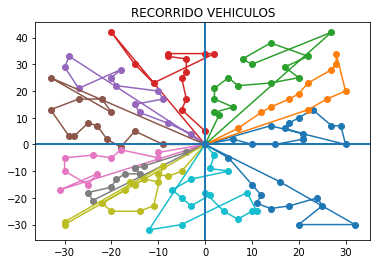

TIEMPO EN COMPUTARIZAR:  0.495739221572876


In [39]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO EN COMPUTARIZAR: ', elapsed_time)

In [40]:
matriz.clear()
del distancias;
demands.clear()
ang.clear()
dist_depo.clear()
orden.clear()


## PROBLEMA VRPNC5m

### CARGA DE DATOS


In [41]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC5/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC5/ClientDemands.csv'
# MEDICION DE TIEMPO
start_time = time()
matriz = []
demands = []
coords = []
dist_depo = []
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[35, 35], [41, 49], [35, 17], [55, 45], [55, 20], [15, 30], [25, 30], [20, 50], [10, 43], [55, 60], [30, 60], [20, 65], [50, 35], [30, 25], [15, 10], [30, 5], [10, 20], [5, 30], [20, 40], [15, 60], [45, 65], [45, 20], [45, 10], [55, 5], [65, 35], [65, 20], [45, 30], [35, 40], [41, 37], [64, 42], [40, 60], [31, 52], [35, 69], [53, 52], [65, 55], [63, 65], [2, 60], [20, 20], [5, 51], [60, 12], [40, 25], [42, 7], [24, 12], [23, 3], [11, 14], [6, 38], [2, 48], [8, 56], [13, 52], [6, 68], [47, 47], [49, 58], [27, 43], [37, 31], [57, 29], [63, 23], [53, 12], [32, 12], [36, 26], [21, 24], [17, 34], [12, 24], [24, 58], [27, 69], [15, 77], [62, 77], [49, 73], [67, 5], [56, 39], [37, 47], [37, 56], [57, 68], [47, 16], [44, 17], [46, 13], [49, 11], [49, 42], [53, 43], [61, 52], [57, 48], [56, 37], [55, 54], [15, 47], [14, 37], [11, 31], [16, 22], [4, 18], [28, 18], [26, 52], [26, 35], [31, 67], [15, 19], [22, 22], [18, 24], [26, 27], [25, 24], [22, 27], [25, 21], [19, 2

### GRAFICAR


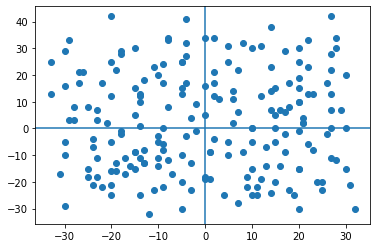

In [42]:
graficar(coords)


### ORDENAMIENTO 


In [43]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [12, 24, 138, 154, 163, 80, 150, 68, 29, 121, 28, 184, 116, 196, 77, 169, 3, 76, 158, 129, 79, 78, 34, 185, 164, 111, 33, 81, 50, 102, 157, 135, 120, 35, 136, 9, 71, 161, 65, 51, 103, 176, 1, 188, 66, 20, 122, 132, 128, 30, 69, 160, 101, 70, 131, 27, 32, 162, 181, 90, 108, 10, 189, 167, 31, 63, 126, 190, 159, 127, 64, 62, 11, 148, 88, 175, 107, 182, 146, 19, 123, 49, 7, 52, 143, 194, 106, 168, 47, 48, 36, 153, 124, 82, 38, 46, 18, 8, 114, 174, 199, 125, 45, 83, 166, 89, 60, 118, 17, 84, 5, 173, 147, 113, 61, 6, 156, 86, 16, 99, 104, 96, 93, 183, 85, 141, 112, 191, 59, 91, 193, 44, 98, 94, 140, 37, 92, 100, 119, 151, 192, 95, 14, 97, 117, 142, 13, 42, 87, 172, 43, 144, 137, 15, 57, 2, 178, 115, 58, 152, 145, 41, 22, 171, 133, 40, 53, 73, 74, 75, 72, 21, 23, 197, 186, 56, 180, 198, 105, 67, 39, 110, 139, 187, 4, 155, 170, 149, 179, 25, 26, 55, 165, 130, 195, 54, 109, 134, 177]


### RUTEO DE VEHICULOS


In [44]:
vehiculos = []
capacidad_or = 200
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 12, 24, 138, 154, 163, 80, 150, 68, 29, 121, 28, 184, 116, 0]
DEMANDA  1 : 198
VEHICULO  2 :  [0, 196, 77, 169, 3, 76, 158, 129, 79, 78, 34, 185, 164, 0]
DEMANDA  2 : 185
VEHICULO  3 :  [0, 111, 33, 81, 50, 102, 157, 135, 120, 35, 136, 9, 0]
DEMANDA  3 : 189
VEHICULO  4 :  [0, 71, 161, 65, 51, 103, 176, 1, 188, 66, 20, 122, 0]
DEMANDA  4 : 192
VEHICULO  5 :  [0, 132, 128, 30, 69, 160, 101, 70, 131, 27, 32, 162, 181, 90, 0]
DEMANDA  5 : 185
VEHICULO  6 :  [0, 108, 10, 189, 167, 31, 63, 126, 190, 159, 127, 0]
DEMANDA  6 : 196
VEHICULO  7 :  [0, 64, 62, 11, 148, 88, 175, 107, 182, 146, 19, 123, 49, 7, 0]
DEMANDA  7 : 200
VEHICULO  8 :  [0, 52, 143, 194, 106, 168, 47, 48, 36, 153, 124, 82, 38, 46, 18, 8, 0]
DEMANDA  8 : 198
VEHICULO  9 :  [0, 114, 174, 199, 125, 45, 83, 166, 89, 60, 118, 17, 84, 0]
DEMANDA  9 : 195
VEHICULO  10 :  [0, 5, 173, 147, 113, 61, 6, 156, 86, 16, 99, 104, 96, 0]
DEMANDA  10 : 198
VEHICULO  11 :  [0, 93, 183, 85, 141, 112, 191, 59, 91, 0]
DEMANDA

### VECINO MAS CERCANO


In [45]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 28, 138, 154, 12, 184, 116, 68, 80, 150, 163, 24, 29, 121, 0]
VEHICULO  2 :  [0, 76, 196, 77, 3, 158, 79, 129, 185, 78, 169, 34, 164, 0]
VEHICULO  3 :  [0, 111, 50, 102, 157, 33, 81, 120, 9, 135, 35, 136, 0]
VEHICULO  4 :  [0, 176, 1, 122, 51, 103, 161, 71, 66, 188, 20, 65, 0]
VEHICULO  5 :  [0, 27, 132, 69, 162, 101, 70, 30, 160, 128, 131, 32, 90, 181, 0]
VEHICULO  6 :  [0, 167, 127, 190, 31, 10, 189, 108, 159, 126, 63, 0]
VEHICULO  7 :  [0, 146, 88, 148, 62, 182, 7, 123, 19, 107, 175, 11, 64, 49, 0]
VEHICULO  8 :  [0, 52, 153, 106, 194, 82, 48, 124, 38, 46, 8, 18, 168, 47, 36, 143, 0]
VEHICULO  9 :  [0, 89, 166, 60, 118, 83, 199, 114, 174, 125, 45, 17, 84, 0]
VEHICULO  10 :  [0, 156, 147, 6, 96, 99, 104, 5, 173, 61, 16, 86, 113, 0]
VEHICULO  11 :  [0, 112, 183, 59, 93, 85, 91, 191, 141, 0]
VEHICULO  12 :  [0, 94, 95, 117, 97, 92, 151, 37, 98, 100, 193, 192, 119, 44, 14, 140, 0]
VEHICULO  13 :  [0, 58, 137, 13, 87, 144, 57, 178, 2, 115, 172, 42, 142, 43, 15, 0]
VEHI

### CALCULO DE COSTOS


In [46]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  342.51870303444616
COSTO VEHICULO  2 :  363.41748495865556
COSTO VEHICULO  3 :  323.4903036342878
COSTO VEHICULO  4 :  465.7743592407473
COSTO VEHICULO  5 :  393.95464921577843
COSTO VEHICULO  6 :  262.76936477602857
COSTO VEHICULO  7 :  526.1845587090577
COSTO VEHICULO  8 :  725.9017197598322
COSTO VEHICULO  9 :  368.16542563687415
COSTO VEHICULO  10 :  304.02188351726124
COSTO VEHICULO  11 :  168.25471416552787
COSTO VEHICULO  12 :  458.2443850221395
COSTO VEHICULO  13 :  541.4558648218182
COSTO VEHICULO  14 :  340.5838919232737
COSTO VEHICULO  15 :  298.94907558161896
COSTO VEHICULO  16 :  498.84150516030576
COSTO TOTAL:  6382.527889157654


### GRAFICAR RECORRIDO

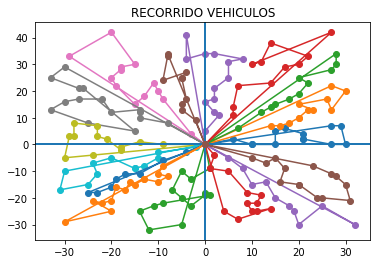

TIEMPO EN COMPUTARIZAR:  0.5470235347747803


In [47]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO EN COMPUTARIZAR: ', elapsed_time)

In [48]:
matriz.clear()
del distancias;
demands.clear()
ang.clear()
dist_depo.clear()
orden.clear()


## PROBLEMA VRPNC11m

### CARGA DE DATOS


In [49]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC11/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC11/ClientDemands.csv'
# MEDICION DE TIEMPO
start_time = time()
matriz = []
demands = []
coords = []
dist_depo = []
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[10, 45], [25, 1], [25, 3], [31, 5], [32, 5], [31, 7], [32, 9], [34, 9], [46, 9], [35, 7], [34, 6], [35, 5], [47, 6], [40, 5], [39, 3], [36, 3], [73, 6], [73, 8], [24, 36], [76, 6], [76, 10], [76, 13], [78, 3], [78, 9], [79, 3], [79, 5], [79, 11], [82, 3], [82, 7], [90, 15], [84, 3], [84, 5], [84, 9], [85, 1], [87, 5], [85, 8], [87, 7], [86, 41], [86, 44], [86, 46], [85, 55], [89, 43], [89, 46], [89, 52], [92, 42], [92, 52], [94, 42], [94, 44], [94, 48], [96, 42], [99, 46], [99, 50], [83, 80], [83, 83], [85, 81], [85, 85], [85, 89], [87, 80], [87, 86], [90, 77], [90, 88], [93, 82], [93, 84], [93, 89], [94, 86], [95, 80], [99, 89], [37, 83], [50, 80], [35, 85], [35, 87], [44, 86], [46, 89], [46, 83], [46, 87], [46, 89], [48, 83], [50, 85], [50, 88], [54, 86], [54, 90], [10, 35], [10, 40], [18, 30], [17, 35], [16, 38], [14, 40], [15, 42], [11, 42], [18, 40], [21, 39], [20, 40], [18, 41], [20, 44], [22, 44], [16, 45], [20, 45], [25, 45], [30, 55], [20, 50], [22,

### GRAFICAR


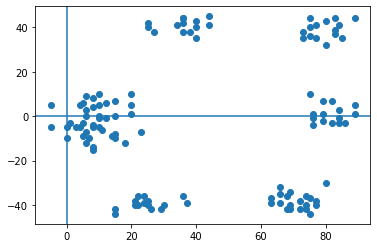

In [50]:
graficar(coords)


### ORDENAMIENTO 


In [51]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [95, 96, 97, 50, 42, 39, 48, 115, 51, 45, 43, 40, 110, 59, 65, 61, 57, 116, 62, 52, 54, 64, 66, 98, 99, 100, 101, 102, 53, 63, 58, 55, 60, 56, 68, 79, 76, 77, 103, 104, 80, 73, 78, 74, 106, 71, 72, 75, 105, 67, 107, 69, 70, 120, 119, 81, 82, 88, 1, 2, 117, 3, 83, 4, 5, 112, 113, 111, 6, 10, 15, 11, 9, 7, 14, 84, 13, 86, 85, 12, 8, 108, 118, 18, 89, 16, 22, 24, 87, 19, 17, 33, 27, 25, 30, 90, 31, 114, 20, 23, 28, 34, 91, 92, 36, 35, 26, 32, 21, 29, 109, 93, 94, 37, 44, 46, 49, 41, 38, 47]


### RUTEO DE VEHICULOS


In [52]:
vehiculos = []
capacidad_or = 200
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 95, 96, 97, 50, 42, 39, 48, 115, 51, 45, 43, 40, 110, 59, 65, 0]
DEMANDA  1 : 197
VEHICULO  2 :  [0, 61, 57, 116, 62, 52, 54, 64, 66, 98, 99, 100, 101, 102, 53, 63, 58, 0]
DEMANDA  2 : 187
VEHICULO  3 :  [0, 55, 60, 56, 68, 79, 76, 77, 103, 104, 80, 73, 78, 74, 106, 71, 72, 75, 0]
DEMANDA  3 : 195
VEHICULO  4 :  [0, 105, 67, 107, 69, 70, 120, 119, 81, 82, 88, 1, 2, 117, 3, 83, 4, 5, 0]
DEMANDA  4 : 199
VEHICULO  5 :  [0, 112, 113, 111, 6, 10, 15, 11, 9, 7, 14, 84, 13, 86, 85, 12, 8, 108, 0]
DEMANDA  5 : 197
VEHICULO  6 :  [0, 118, 18, 89, 16, 22, 24, 87, 19, 17, 33, 27, 25, 30, 90, 31, 114, 0]
DEMANDA  6 : 199
VEHICULO  7 :  [0, 20, 23, 28, 34, 91, 92, 36, 35, 26, 32, 21, 29, 109, 93, 94, 37, 44, 46, 49, 41, 38, 0]
DEMANDA  7 : 194


### VECINO MAS CERCANO


In [53]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 95, 96, 97, 115, 110, 40, 43, 45, 48, 42, 39, 50, 51, 59, 65, 0]
VEHICULO  2 :  [0, 102, 101, 99, 100, 116, 98, 52, 54, 57, 53, 58, 62, 61, 64, 63, 66, 0]
VEHICULO  3 :  [0, 106, 104, 103, 73, 76, 77, 78, 72, 75, 74, 71, 68, 79, 80, 56, 55, 60, 0]
VEHICULO  4 :  [0, 88, 82, 81, 117, 83, 119, 120, 105, 107, 67, 69, 70, 5, 3, 4, 2, 1, 0]
VEHICULO  5 :  [0, 111, 86, 85, 112, 84, 113, 108, 6, 7, 9, 10, 11, 15, 14, 13, 12, 8, 0]
VEHICULO  6 :  [0, 87, 89, 90, 18, 114, 118, 17, 16, 19, 25, 24, 22, 27, 30, 31, 33, 0]
VEHICULO  7 :  [0, 92, 91, 93, 94, 109, 21, 20, 23, 26, 28, 32, 35, 36, 34, 29, 37, 38, 41, 44, 46, 49, 0]


### CALCULO DE COSTOS


In [54]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  1142.8241753281568
COSTO VEHICULO  2 :  1056.6671381160143
COSTO VEHICULO  3 :  1143.4999056623994
COSTO VEHICULO  4 :  1483.3147243071733
COSTO VEHICULO  5 :  724.3588997291853
COSTO VEHICULO  6 :  947.7611201402407
COSTO VEHICULO  7 :  1874.1963141379981
COSTO TOTAL:  8372.622277421167


### GRAFICAR RECORRIDO

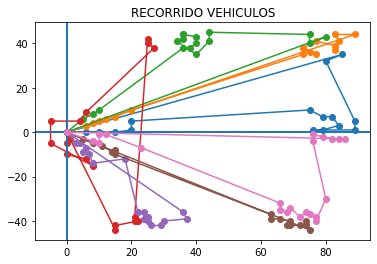

TIEMPO EN COMPUTARIZAR:  0.4752018451690674


In [55]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO EN COMPUTARIZAR: ', elapsed_time)

In [56]:
matriz.clear()
del distancias;
demands.clear()
ang.clear()
dist_depo.clear()
orden.clear()


## PROBLEMA VRPNC12m

### CARGA DE DATOS


In [57]:
# Localizacion de archivos
arch_coords='Instancias CCVRP/VRPNC12/Coords.csv'
arch_demands='Instancias CCVRP/VRPNC12/ClientDemands.csv'
# MEDICION DE TIEMPO
start_time = time()
matriz = []
demands = []
coords = []
dist_depo = []
dimension, matriz, distancias, demands, coords, ang, dist_depo = carga_csv(arch_coords, arch_demands, matriz, coords)


COORDENADAS ORIGINALES: 
 [[40, 50], [45, 68], [45, 70], [42, 66], [42, 68], [42, 65], [40, 69], [40, 66], [38, 68], [38, 70], [35, 66], [35, 69], [25, 85], [22, 75], [22, 85], [20, 80], [20, 85], [18, 75], [15, 75], [15, 80], [30, 50], [30, 52], [28, 52], [28, 55], [25, 50], [25, 52], [25, 55], [23, 52], [23, 55], [20, 50], [20, 55], [10, 35], [10, 40], [8, 40], [8, 45], [5, 35], [5, 45], [2, 40], [0, 40], [0, 45], [35, 30], [35, 32], [33, 32], [33, 35], [32, 30], [30, 30], [30, 32], [30, 35], [28, 30], [28, 35], [26, 32], [25, 30], [25, 35], [44, 5], [42, 10], [42, 15], [40, 5], [40, 15], [38, 5], [38, 15], [35, 5], [50, 30], [50, 35], [50, 40], [48, 30], [48, 40], [47, 35], [47, 40], [45, 30], [45, 35], [95, 30], [95, 35], [53, 30], [92, 30], [53, 35], [45, 65], [90, 35], [88, 30], [88, 35], [87, 30], [85, 25], [85, 35], [75, 55], [72, 55], [70, 58], [68, 60], [66, 55], [65, 55], [65, 60], [63, 58], [60, 55], [60, 60], [67, 85], [65, 85], [65, 82], [62, 80], [60, 80], [60, 85], [58,

### GRAFICAR


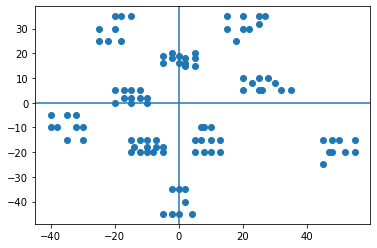

In [58]:
graficar(coords)


### ORDENAMIENTO 


In [59]:
orden = ordenar(ang)


ORDEN DE LAS CIUDADES POR ANGULO: 
 [82, 83, 86, 87, 90, 84, 89, 85, 88, 91, 94, 92, 95, 98, 93, 96, 97, 99, 100, 75, 1, 2, 5, 3, 4, 6, 7, 9, 8, 11, 10, 12, 14, 16, 15, 13, 19, 17, 18, 23, 26, 28, 30, 21, 22, 25, 27, 20, 24, 29, 39, 36, 34, 38, 37, 33, 32, 35, 31, 52, 49, 50, 51, 47, 48, 46, 45, 43, 44, 42, 41, 40, 60, 59, 58, 56, 57, 54, 55, 53, 68, 69, 64, 66, 61, 72, 62, 67, 65, 74, 63, 80, 79, 77, 73, 70, 81, 78, 76, 71]


### RUTEO DE VEHICULOS


In [60]:
vehiculos = []
capacidad_or = 200
vehiculos = rutear_vehiculos(capacidad_or, orden, demands)


VEHICULO  1 :  [0, 82, 83, 86, 87, 90, 84, 89, 85, 88, 91, 94, 92, 0]
DEMANDA  1 : 200
VEHICULO  2 :  [0, 95, 98, 93, 96, 97, 99, 100, 75, 1, 0]
DEMANDA  2 : 190
VEHICULO  3 :  [0, 2, 5, 3, 4, 6, 7, 9, 8, 11, 10, 12, 14, 0]
DEMANDA  3 : 180
VEHICULO  4 :  [0, 16, 15, 13, 19, 17, 18, 23, 26, 28, 0]
DEMANDA  4 : 200
VEHICULO  5 :  [0, 30, 21, 22, 25, 27, 20, 24, 29, 39, 36, 34, 0]
DEMANDA  5 : 180
VEHICULO  6 :  [0, 38, 37, 33, 32, 35, 31, 52, 49, 50, 51, 47, 0]
DEMANDA  6 : 200
VEHICULO  7 :  [0, 48, 46, 45, 43, 44, 42, 41, 40, 60, 59, 58, 56, 0]
DEMANDA  7 : 200
VEHICULO  8 :  [0, 57, 54, 55, 53, 68, 69, 64, 66, 61, 72, 62, 67, 0]
DEMANDA  8 : 200
VEHICULO  9 :  [0, 65, 74, 63, 80, 79, 77, 73, 70, 0]
DEMANDA  9 : 180


### VECINO MAS CERCANO


In [61]:
costos = []
costos, vehiculos = vecino_cercano(distancias, vehiculos, dist_depo, dimension)


VEHICULO  1 :  [0, 90, 89, 88, 85, 84, 83, 82, 86, 87, 91, 94, 92, 0]
VEHICULO  2 :  [0, 75, 1, 98, 96, 95, 97, 93, 100, 99, 0]
VEHICULO  3 :  [0, 5, 3, 4, 6, 8, 9, 11, 10, 7, 2, 12, 14, 0]
VEHICULO  4 :  [0, 23, 26, 28, 13, 17, 18, 19, 15, 16, 0]
VEHICULO  5 :  [0, 20, 21, 22, 25, 24, 27, 29, 30, 34, 36, 39, 0]
VEHICULO  6 :  [0, 47, 49, 52, 50, 51, 31, 32, 33, 35, 37, 38, 0]
VEHICULO  7 :  [0, 43, 42, 41, 40, 44, 45, 46, 48, 59, 58, 56, 60, 0]
VEHICULO  8 :  [0, 67, 66, 69, 62, 61, 64, 68, 72, 55, 57, 54, 53, 0]
VEHICULO  9 :  [0, 65, 63, 74, 80, 79, 77, 73, 70, 0]


### CALCULO DE COSTOS


In [62]:
costos = calculo_costos(costos)


COSTO VEHICULO  1 :  534.1467436708255
COSTO VEHICULO  2 :  373.5079042005559
COSTO VEHICULO  3 :  390.7891456958639
COSTO VEHICULO  4 :  337.14990636700475
COSTO VEHICULO  5 :  298.859817181237
COSTO VEHICULO  6 :  445.27910655364286
COSTO VEHICULO  7 :  444.88850541997294
COSTO VEHICULO  8 :  475.03846276116104
COSTO VEHICULO  9 :  354.6069045389375
COSTO TOTAL:  3654.266496389202


### GRAFICAR RECORRIDO

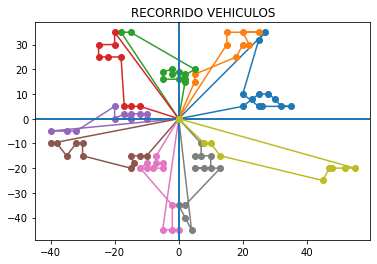

TIEMPO EN COMPUTARIZAR:  0.5136246681213379


In [63]:
graficar_recorrido(vehiculos, coords)
elapsed_time = time() - start_time
print('TIEMPO EN COMPUTARIZAR: ', elapsed_time)

In [64]:
matriz.clear()
del distancias;
demands.clear()
ang.clear()
dist_depo.clear()
orden.clear()


# COMPARACION DE RESULTADOS 

Se incluyen resultados y su interpretación, deberás de resolver todas las instancias de prueba 
Comparemos entonces, los resultados obtenidos de este algoritmo con aquellos que nos dieron como los optimos:

                DADO         OBTENIDO
VRPNC1m--------2230.35-------2187.833128324909 

VRPNC2m--------2391.63-------2265.465223491526 

VRPNC3m--------4045.42-------4280.604917292902 

VRPNC4m--------4987.52-------5408.94291969988 

VRPNC5m--------5809.59-------6382.527889157654 

VRPNC11m-------7314.55-------8372.622277421167 

VRPNC12m-------3558.92-------3654.266496389202 

En los primeros dos problemas podemos notar como nuestro algoritmo fue capaz de encontrar un mejor resultado del que nos daban como un óptimo. Por otro lado, en los demas problemas siempre hubo mucha diferencia entre lo dado y lo obtenido, éstas podían variar desde 100 a 200 unidades o incluso llegando a las 500 o 1000 unidades.

Con esto, podemos decir que nuestro algoritmo no es consistente en cuanto a los resultados, puesto que no siempre se acerca a los resultados dados como los optimos pero hay casos que incluso los supera.